# Question 1: Occupations

Step 1: Import the necessary libraries

In [78]:
# importing librariesq
import pandas as pd
import urllib

Step 2: Import the dataset from this address = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user".

Step 3: Assign it to a variable called users

In [79]:
#importing dataset and assigning to it variable called users
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 4: Discover what is the mean age per occupation

In [81]:
# Finding out the mean age per occupation.
# Note: Here I am using round function to limit the decimal numbers in the Mean Value. So it become more meaningful and Ease to read.
round(users.groupby('occupation').age.mean(),1)

occupation
administrator    38.7
artist           31.4
doctor           43.6
educator         42.0
engineer         36.4
entertainment    29.2
executive        38.7
healthcare       41.6
homemaker        32.6
lawyer           36.8
librarian        40.0
marketing        37.6
none             26.6
other            34.5
programmer       33.1
retired          63.1
salesman         35.7
scientist        35.5
student          22.1
technician       33.1
writer           36.3
Name: age, dtype: float64

Step 5: Discover the Male ratio per occupation and sort it from the most to the least

In [85]:
male_ratio = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

total = male_ratio[['F', 'M']].sum(axis=1)
male_ratio['MaleRatio'] = round(100 * male_ratio['M'] / total,2) # Here i am rounding the value to 2 decimal places

male_ratio = male_ratio['MaleRatio'].sort_values(ascending=False) # ascending = False will arrange the data in decending order.
male_ratio

occupation
doctor           100.00
engineer          97.01
technician        96.30
retired           92.86
programmer        90.91
executive         90.62
scientist         90.32
entertainment     88.89
lawyer            83.33
salesman          75.00
educator          72.63
student           69.39
other             65.71
marketing         61.54
writer            57.78
none              55.56
administrator     54.43
artist            53.57
librarian         43.14
healthcare        31.25
homemaker         14.29
Name: MaleRatio, dtype: float64

Step 6: For each occupation, calculate the minimum and maximum ages

In [86]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 7: For each combination of occupation and sex, calculate the mean age

In [87]:
round(users.groupby(['occupation', 'gender']).age.mean(),1) 
# Note: here i have rounded the mean value to the 1 decimal place for more meaningful and readable result.

occupation     gender
administrator  F         40.6
               M         37.2
artist         F         30.3
               M         32.3
doctor         M         43.6
educator       F         39.1
               M         43.1
engineer       F         29.5
               M         36.6
entertainment  F         31.0
               M         29.0
executive      F         44.0
               M         38.2
healthcare     F         39.8
               M         45.4
homemaker      F         34.2
               M         23.0
lawyer         F         39.5
               M         36.2
librarian      F         40.0
               M         40.0
marketing      F         37.2
               M         37.9
none           F         36.5
               M         18.6
other          F         35.5
               M         34.0
programmer     F         32.2
               M         33.2
retired        F         70.0
               M         62.5
salesman       F         27.0
               M  

Step 8: For each occupation present the percentage of women and men

In [89]:
gender_ocupation = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

occupation_count = users.groupby(['occupation']).count()

occupation_gender = round((gender_ocupation.div(occupation_count, level = "occupation"))*100,2)
occupation_gender.loc[:, 'gender']

# Note: here i have rounded the Percentage value to the 2 decimal place for more meaningful and readable result.

occupation     gender
administrator  F          45.57
               M          54.43
artist         F          46.43
               M          53.57
doctor         M         100.00
educator       F          27.37
               M          72.63
engineer       F           2.99
               M          97.01
entertainment  F          11.11
               M          88.89
executive      F           9.38
               M          90.62
healthcare     F          68.75
               M          31.25
homemaker      F          85.71
               M          14.29
lawyer         F          16.67
               M          83.33
librarian      F          56.86
               M          43.14
marketing      F          38.46
               M          61.54
none           F          44.44
               M          55.56
other          F          34.29
               M          65.71
programmer     F           9.09
               M          90.91
retired        F           7.14
               M  

# Question 2: Euro Teams

Step 1: Import the necessary libraries

In [9]:
import pandas as pd

Step 2: Import the dataset from this address = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

Step 3: Assign it to a variable called euro12

In [10]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


Step 4: Select only the Goal column

In [11]:
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


Step 5: How many team participated in the Euro2012?

In [12]:
euro12['Team'].count()

16

Step 6: What is the number of columns in the dataset?

In [13]:
euro12.shape[1]

35

Step 7: View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [14]:
discipline = pd.DataFrame(euro12, columns=['Team','Yellow Cards', 'Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8: Sort the teams by Red Cards, then to Yellow Cards

In [15]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = True)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


Step 9: Calculate the mean Yellow Cards given per Team

In [17]:
perteam_yellow= pd.DataFrame(euro12.groupby(['Team'])['Yellow Cards'].mean())
perteam_yellow

,Yellow Cards
Team,
Croatia,9
Czech Republic,7
Denmark,4
England,5
France,6
Germany,4
Greece,9
Italy,16
Netherlands,5


Step 10: Filter teams that scored more than 6 goalsStep

In [18]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11: Select the teams that start with G

In [19]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12: Select the first 7 columns

In [20]:
euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13: Select all columns except the last 3

In [21]:
euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14: Present only the Shooting Accuracy from England, Italy and Russia

In [90]:
teams = euro12[euro12.Team.isin(['England','Italy','Russia'])]
teams[['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3: Housing

Step 1: Import the necessary libraries

In [23]:
import numpy as np
import pandas as pd
import random

Step 2: Create 3 differents Series, each of length 100, as follows:
* The first a random number from 1 to 4
* The second a random number from 1 to 3
* The third a random number from 10,000 to 30,000

* The first a random number from 1 to 4

In [92]:
first_series = [[random.randint(1, 4)] for i in range(100)]
df1 = pd.DataFrame(first_series)
df1

,0
0,2
1,1
2,2
3,2
4,1
...,...
95,3
96,4
97,2
98,4


* The second a random number from 1 to 3

In [93]:
second_series = [[random.randint(1, 3)] for i in range(100)]
df2 = pd.DataFrame(second_series)
df2

,0
0,3
1,2
2,1
3,1
4,3
...,...
95,2
96,1
97,3
98,2


In [94]:
third_series = [[random.randint(10000, 30000)] for i in range(100)]
df3 = pd.DataFrame(third_series)
df3

,0
0,16305
1,15425
2,29675
3,24115
4,21604
...,...
95,29459
96,23892
97,28411
98,27907


Step 3: Create a DataFrame by joinning the Series by column

In [98]:
df = pd.concat([df1, df2 , df3], axis=1)
df

,0,0,0
0,2,3,16305
1,1,2,15425
2,2,1,29675
3,2,1,24115
4,1,3,21604
...,...,...,...
95,3,2,29459
96,4,1,23892
97,2,3,28411
98,4,2,27907


Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [100]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,2,3,16305
1,1,2,15425
2,2,1,29675
3,2,1,24115
4,1,3,21604
...,...,...,...
95,3,2,29459
96,4,1,23892
97,2,3,28411
98,4,2,27907


Step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [101]:
df_new = df.bedrs.astype(str).str.cat(df.bathrs.astype(str)).str.cat(df.price_sqr_meter.astype(str))
df_new.columns = ['bigcolumn']
df_new

0     2316305
1     1215425
2     2129675
3     2124115
4     1321604
       ...   
95    3229459
96    4123892
97    2328411
98    4227907
99    4113706
Name: bedrs, Length: 100, dtype: object

Step 6. Ops it seems it is going only until index 99. Is it true?

Yes, it is true. It is clear from above that index range from 0 to 99.

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [102]:
df_new.index = pd.RangeIndex(start=0, stop=300)
df_new

ValueError: Length mismatch: Expected axis has 100 elements, new values have 300 elements

# Question 4: Wind Statistics

Step 1: Import the necessary libraries

In [31]:
import pandas as pd
import numpy as np

Step 2: Import the dataset from the attached file wind.txt

In [180]:
data = pd.read_csv('wind.txt', sep = '\s+')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 3: Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.

In [104]:
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])

#re-arrange cols
data = data[['Date','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']]
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 4: Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.

In [106]:
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,
                        data.Date,data.Date - pd.offsets.DateOffset(years=100))
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 5: Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].

In [107]:
data = data.set_index('Date')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


Step 6: Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.

In [108]:
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Step 7: Compute how many non-missing values there are in total.

In [109]:
data = data.dropna()
data.notna().sum().sum()

78552

Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.

In [111]:
avg_wind_speed = round(data.mean().mean(),2)
avg_wind_speed

# Note: here the dataset contains the 2 decimal place values for wind so I have round the mean value to 2 decimal places.

10.22

Step 9: Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.

In [112]:
loc_stats = data.describe()
loc_stats.loc[['mean','std','min','max'],:]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


Step 10: Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.

In [115]:
day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = round(data.mean(axis=1),2)
day_stats['std'] = round(data.std(axis=1),2)

day_stats

# Note: here the dataset contains the 2 decimal place values for wind so I have round the mean value and std to 2 decimal places.

,min,max,mean,std
Date,,,,
1961-01-04,1.79,11.75,6.62,3.20
1961-01-05,6.17,13.33,10.63,2.45
1961-01-06,4.42,13.21,8.24,3.00
1961-01-07,4.96,14.29,10.38,3.07
1961-01-08,5.91,16.62,10.49,3.55
...,...,...,...,...
1978-12-27,8.08,40.08,16.71,7.87
1978-12-28,5.00,41.46,15.15,9.69
1978-12-29,8.71,29.58,14.89,5.76


Step 11: Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.

In [117]:
round(data.loc[data.index.month == 1].mean(),2)
# Note: here the dataset contains the 2 decimal place values for wind so I have round the mean value to 2 decimal places.

RPT    14.83
VAL    12.89
ROS    13.28
KIL     7.15
SHA    11.64
BIR     8.03
DUB    11.79
CLA     9.49
MUL     9.51
CLO    10.02
BEL    14.53
MAL    18.04
dtype: float64

Step 12: Downsample the record to a yearly frequency for each location.

In [119]:
freq_yearly = round(data.resample('Y').mean(),2)
freq_yearly.index = freq_yearly.index.to_period('Y')
freq_yearly
# Note: here the dataset contains the 2 decimal place values for wind so I have round the mean value to 2 decimal places.

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,12.21,10.21,11.28,6.85,10.74,7.62,9.63,8.68,8.57,9.70,13.27,13.59
1962,12.27,10.15,11.71,6.96,10.69,7.42,11.04,8.83,8.34,9.69,12.99,14.36
1963,12.81,10.84,12.54,7.33,11.72,8.43,11.08,10.34,8.90,10.22,13.64,15.00
1964,12.36,10.92,12.10,6.79,11.45,7.57,10.26,9.47,7.79,10.21,13.74,14.91
1965,12.45,11.08,11.85,6.86,11.02,7.48,10.62,8.88,7.91,9.92,12.96,15.59
1966,13.46,11.56,12.02,7.35,11.81,7.79,10.58,8.84,8.51,9.77,14.27,16.31
1967,12.74,10.99,11.74,7.14,11.63,7.37,10.65,9.33,8.65,9.55,14.77,17.14
1968,11.84,10.47,11.41,6.48,10.76,6.07,8.86,8.26,7.22,7.83,12.81,15.02
1969,11.17,9.72,10.90,5.77,9.87,6.19,8.56,7.71,7.92,7.75,12.62,15.76


Step 13: Downsample the record to a monthly frequency for each location.

In [120]:
freq_monthly = round(data.resample('M').mean(),2)
freq_monthly.index = freq_monthly.index.to_period('M')
freq_monthly

# Note: here the dataset contains the 2 decimal place values for wind so I have round the mean value to 2 decimal places.

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01,14.51,11.23,12.96,6.84,10.51,8.17,10.40,8.67,8.32,9.49,13.27,14.34
1961-02,16.40,15.04,14.47,9.24,13.78,10.88,11.87,11.75,11.75,12.63,18.16,15.30
1961-03,10.66,11.10,10.42,7.10,10.27,8.58,9.11,9.33,10.10,10.99,16.07,15.42
1961-04,10.72,9.43,10.00,5.83,8.43,6.49,6.93,7.09,7.34,7.24,11.15,10.28
1961-05,10.02,8.50,10.54,5.99,9.48,6.63,7.65,8.21,8.12,8.53,11.91,11.91
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.65,8.26,9.03,4.50,7.37,5.94,5.65,5.42,7.24,5.54,10.47,12.05
1978-09,10.91,10.89,10.64,5.72,10.37,9.28,10.79,9.58,10.07,8.94,15.68,19.39
1978-10,9.90,8.67,9.30,4.72,8.53,6.77,8.12,7.34,8.30,8.24,13.78,17.15


Step 14: Downsample the record to a weekly frequency for each location.

In [121]:
freq_weekly = round(data.resample('W').mean(),2)
freq_weekly.index = freq_weekly.index.to_period('W')
freq_weekly
# Note: here the dataset contains the 2 decimal place values for wind so I have round the mean value to 2 decimal places.

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-02/1961-01-08,12.32,10.41,10.05,5.66,8.51,6.24,10.94,5.93,8.15,8.43,11.42,13.23
1961-01-09/1961-01-15,12.47,8.97,11.96,4.63,7.35,5.07,7.54,6.82,5.71,7.57,11.13,11.02
1961-01-16/1961-01-22,12.10,9.50,11.68,4.29,8.97,6.94,7.83,7.29,5.89,6.69,9.99,10.35
1961-01-23/1961-01-29,19.88,14.85,17.55,11.92,16.32,14.02,14.45,14.31,13.32,14.92,19.80,22.39
1961-01-30/1961-02-05,16.83,15.46,12.62,8.25,13.36,9.11,12.20,8.55,9.82,9.46,14.01,11.94
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.93,11.23,13.94,5.57,10.22,8.62,9.64,7.69,9.01,9.55,11.84,18.73
1978-12-04/1978-12-10,20.74,19.19,17.03,9.78,15.29,12.77,14.44,12.49,13.87,14.08,18.52,23.06
1978-12-11/1978-12-17,16.76,14.69,14.99,6.92,11.40,7.27,10.21,7.97,9.17,8.57,11.10,15.56


Step 15: Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [122]:
week_data = data.resample('W').agg(['min','max','mean','std'])

week_data.loc[week_data.index[1:53], : ]

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  17.75  12.100000  4.893064   3.42  14.37   9.500000   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  20.79  14.846667   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  14.956667  5.525210  11.63  20.17  15.008333   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  11.824000  1.071742   8.83  17.00  12.956000   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.195000   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25   9.818000  4.853908   3.50  16.29   7.684000   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.901667  3.673850   3.96  11.54   7.645000   
1961-05-21   4.88  15.04   8.561667  3.857369   3.58  10.17   5.631667   
1961-05-28   4.96  10.92   7.550000  2.433828   3.67  11.17   6.536667   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13   9.826000  2.629340   6.34  11.42   8.310000   
1961-07-09   7.29  17.50  11.806667  4.005984   3.75  10.75   7.221667   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21   9.928000  4.931346   4.42  10.00   8.026000   
1961-08-20  13.13  18.91  15.471667  2.470590   7.25  13.62  10.513333   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.291667  1.250191   2.92  13.62   7.645000   
1961-10-01  10.34  19.12  14.850000  3.600911   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.905000   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  21.34  14.353333  7.143390   2.75  17.00  10.303333   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.638333  3.229622   3.29  11.79   6.886667   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04  20.54  13.634286  5.787783   3.08  16.04   9.504286   
1962-01-07   3.17 

# Question 5:

Step 1: Import the necessary libraries

In [47]:
import pandas as pd
import numpy as np

Step 2: Import the dataset from this address = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

Step 3: Assign it to a variable called chipo.

In [135]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

Step 4: See the first 10 entries

In [136]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5: What is the number of observations in the dataset?

In [137]:
chipo.shape[0]

4622

Step 6: What is the number of columns in the dataset?

In [138]:
chipo.shape[1]

5

Step 7: Print the name of all the columns.

In [139]:
list(chipo)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

Step 8: How is the dataset indexed?

In [140]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9: Which was the most-ordered item?

In [141]:
ordered_item=chipo.groupby(['item_name'])['quantity'].sum()
print(ordered_item.idxmax())

Chicken Bowl


Step 10: For the most-ordered item, how many items were ordered?

In [142]:
ordered_item.max()

761

Step 11: What was the most ordered item in the choice_description column?

In [143]:
most_ordered = chipo.groupby('choice_description').sum().sort_values('quantity',ascending = False)
most_ordered.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


Step 12: How many items were orderd in total?

In [144]:
chipo['quantity'].sum()

4972

Step 13:
* Turn the item price into a float
* Check the item price type
* Create a lambda function and change the type of item price
* Check the item price type

* Turn the item price into a float

In [145]:
chipo.item_price.str.slice(1).astype(float).head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

* Check the item price type

In [146]:
print(chipo.item_price.dtype)

object


* Create a lambda function and change the type of item price

In [147]:
chipo['item_price']=chipo['item_price'].apply(lambda x: x.replace('$', '')).astype('float')
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

* Check the item price type

In [148]:
print(chipo.item_price.dtype)

float64


Step 14: How much was the revenue for the period in the dataset?

In [149]:
total=chipo['item_price']*chipo['quantity']
revenue=total.sum()
print(revenue)

39237.02


Step 15: How many orders were made in the period?

In [150]:
chipo.order_id.value_counts().count()

1834

Step 16: What is the average revenue amount per order?

In [151]:
# created a new column to calculate the total quantity multiplied with item price and then did the mean of the total with 2 decimal places 
chipo['total'] = chipo['quantity'] * chipo['item_price']
round(chipo.groupby(['order_id']).total.sum().mean(),2)

# Note: dataset has price value with 2 decimal so I have rounded the values to 2 decimals

21.39

Step 17: How many different items are sold?

In [152]:
chipo.item_name.value_counts().count()

50

# Question 6:
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
marriage = pd.read_csv("us-marriages-divorces-1867-2014.csv")
marriage.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


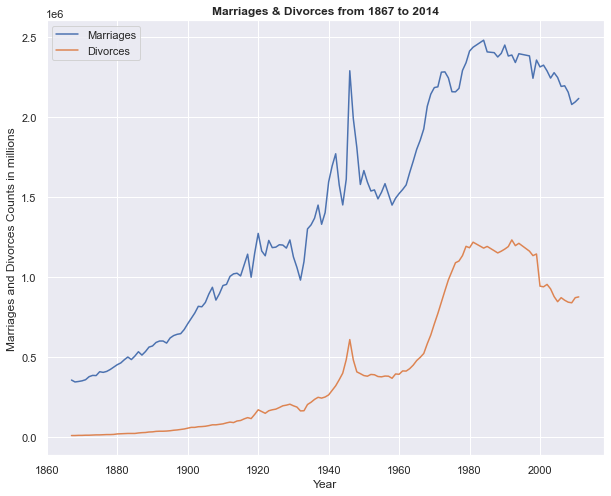

In [158]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.lineplot(x="Year", y='Marriages',data=marriage,label = 'Marriages')
ax = sns.lineplot(x="Year", y='Divorces' ,data=marriage,label = 'Divorces')
ax.set_title('Marriages & Divorces from 1867 to 2014',weight='bold')
ax.set_ylabel('Marriages and Divorces Counts in millions')
plt.show()

# Question 7:

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

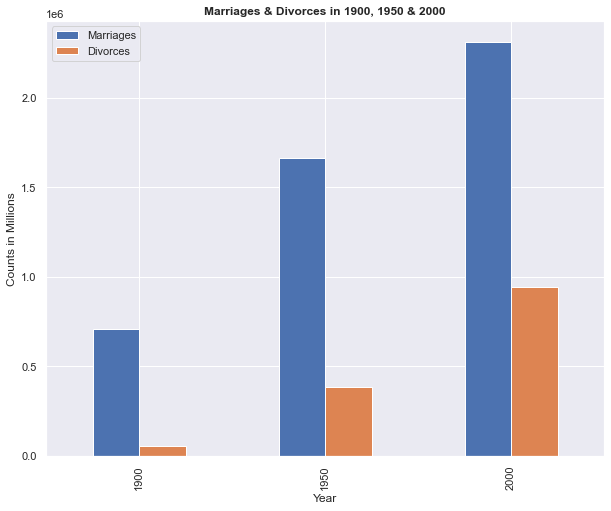

In [159]:
import matplotlib.pyplot as plt

marriage_comparison = marriage[marriage['Year'].isin(['1900','1950','2000'])]
ax = marriage_comparison.plot("Year", ["Marriages", "Divorces"], kind="bar", align='center')
ax.set_title('Marriages & Divorces in 1900, 1950 & 2000',weight='bold')
ax.set_ylabel('Counts in Millions')

plt.show()

# Question 8:
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

In [175]:
import matplotlib.pyplot as plt
import pandas as pd
deadliest_actors = pd.read_csv("actor_kill_counts.csv")
deadliest_actors = deadliest_actors.sort_values(['Count']).reset_index(drop=True)
deadliest_actors

,Actor,Count
0,Wesley Snipes,193
1,Clive Owen,194
2,Jet Li,201
3,Nicolas Cage,204
4,Clint Eastwood,207
5,Tomisaburo Wakayama,226
6,Dolph Lundgren,239
7,Sylvester Stallone,267
8,Chow Yun-Fat,295
9,Arnold Schwarzenegger,369


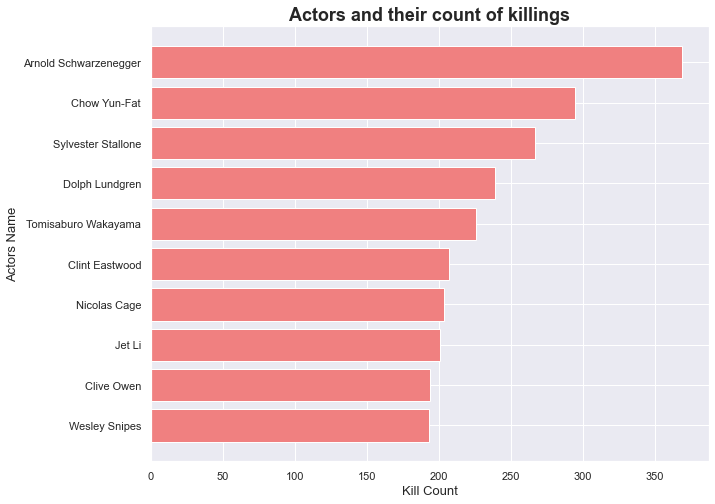

In [176]:
fig,ax = plt.subplots()
ax.barh(deadliest_actors["Actor"], deadliest_actors["Count"], align='center',color='lightcoral')
ax.set_title('Actors and their count of killings',weight='bold',fontsize=18)
ax.set_xlabel('Kill Count',fontsize=13)
ax.set_ylabel('Actors Name',fontsize=13)
fig.set_size_inches(10, 8)
plt.show()

# Question 9:
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

In [75]:
import pandas as pd
romans = pd.read_csv("roman-emperor-reigns.csv")
death_count = pd.DataFrame(romans.groupby('Cause_of_Death')['Emperor'].count().reset_index())
death_count

,Cause_of_Death,Emperor
0,Assassinated,22
1,Died in captivity,1
2,Executed,3
3,Illness,5
4,Killed in battle,8
5,Natural causes,16
6,Possibly assassinated,8
7,Suicide,5


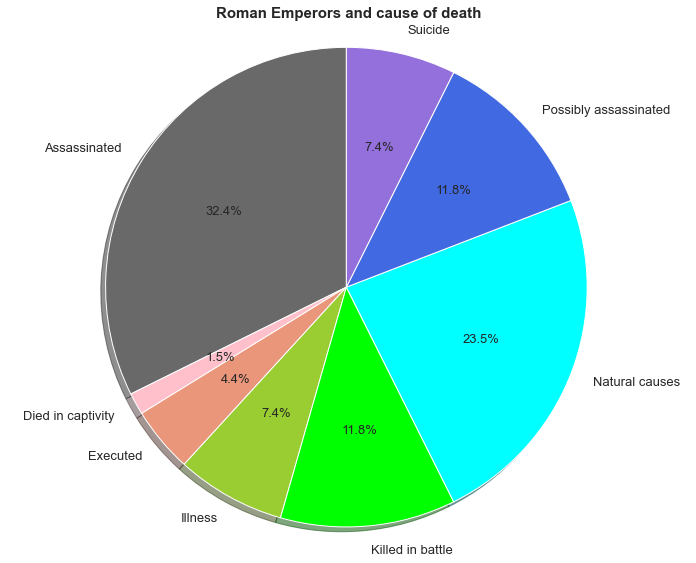

In [170]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
labels = death_count['Cause_of_Death']
colors = ['dimgray','pink','darksalmon','yellowgreen','lime','aqua','royalblue','mediumpurple']
ax1.pie(death_count['Emperor'],labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 13})

 #Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Roman Emperors and cause of death', fontsize=15, weight='bold')
fig1.set_size_inches(10, 8)

plt.tight_layout()
plt.show()

# Question 10: 
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

In [173]:
import pandas as pd
arcade = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
arcade

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


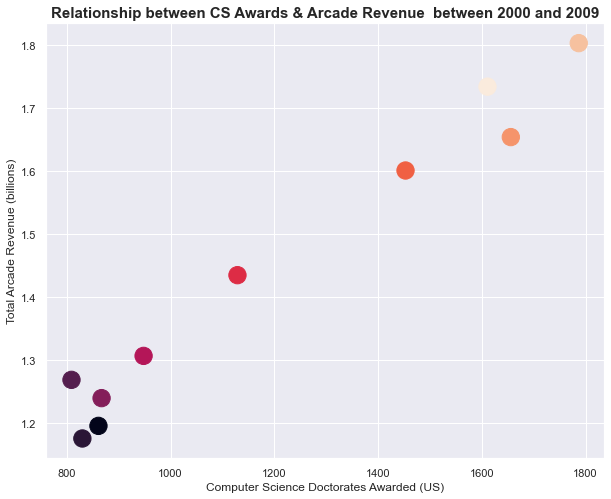

In [174]:
import matplotlib.pyplot as plt
plt.scatter(arcade['Computer Science Doctorates Awarded (US)'], arcade['Total Arcade Revenue (billions)'], s=(300),c=(1,2,3,4,5,6,7,8,9,10))
plt.gcf().set_size_inches(10, 8)
plt.title('Relationship between CS Awards & Arcade Revenue  between 2000 and 2009', weight='bold', fontsize=15)
plt.xlabel('Computer Science Doctorates Awarded (US)')
plt.ylabel('Total Arcade Revenue (billions)')
plt.show()